# Load Preview

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import joblib
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
df_jan = pd.read_csv('/content/sales_data_january_2019.csv')
df_feb = pd.read_csv('/content/sales_data_february_2019.csv')
df_mar = pd.read_csv('/content/sales_data_march_2019.csv')
df_apr = pd.read_csv('/content/sales_data_april_2019.csv')
df_may = pd.read_csv('/content/sales_data_may_2019.csv')
df_jun = pd.read_csv('/content/sales_data_june_2019.csv')
df_jul = pd.read_csv('/content/sales_data_july_2019.csv')
df_aug = pd.read_csv('/content/sales_data_august_2019.csv')
df_sep = pd.read_csv('/content/sales_data_september_2019.csv')
df_oct = pd.read_csv('/content/sales_data_october_2019.csv')
df_nov = pd.read_csv('/content/sales_data_november_2019.csv')
df_dec = pd.read_csv('/content/sales_data_december_2019.csv')

In [ ]:
df_jan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
df_feb.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [ ]:
df_mar.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [ ]:
df_apr.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
df_may.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [ ]:
df_jun.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [ ]:
df_jul.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


In [ ]:
df_aug.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [ ]:
df_sep.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [ ]:
df_oct.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [ ]:
df_nov.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


In [ ]:
df_dec.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Main df (Concating)

In [ ]:
df_2019=pd.concat([df_jan,df_feb,df_mar,df_apr,df_may,df_jun,df_jul,df_aug,df_sep,df_oct,df_nov,df_dec], ignore_index=True)
df_2019.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


In [ ]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


# Pre-Processing

## Missing Values

In [ ]:
df_2019.shape

(186850, 6)

In [ ]:
df_2019.isnull().sum()

,0
Order ID,545
Product,545
Quantity Ordered,545
Price Each,545
Order Date,545
Purchase Address,545


In [ ]:
df_2019[df_2019.isnull().all(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184678,NaN,NaN,NaN,NaN,NaN,NaN
184695,NaN,NaN,NaN,NaN,NaN,NaN
185042,NaN,NaN,NaN,NaN,NaN,NaN
185729,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_2019.dropna(how='all', inplace=True)

In [ ]:
df_2019.shape

(186305, 6)

In [ ]:
df_2019.isnull().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


### Insight

- Ditemukan `545` missing values pada seluruh fitur utama.

- Setelah dilakukan pengecekan, baris-baris tersebut `benar-benar kosong` di semua kolom.

- Oleh karena itu, dilakukan penanganan dengan cara menghapus seluruh baris yang memiliki missing values di semua kolom.

## Duplicate

In [ ]:
df_2019.shape

(186305, 6)

In [ ]:
df_2019.duplicated(subset=['Order ID']).sum()

np.int64(7867)

In [ ]:
df_2019[df_2019.duplicated(keep=False)].sort_values(by=['Order ID'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
874,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
4125,145143,Lightning Charging Cable,1,14.95,01/06/19 03:01,"182 Jefferson St, San Francisco, CA 94016"
4126,145143,Lightning Charging Cable,1,14.95,01/06/19 03:01,"182 Jefferson St, San Francisco, CA 94016"
5811,146765,Google Phone,1,600,01/21/19 11:23,"918 Highland St, New York City, NY 10001"
...,...,...,...,...,...,...
93423,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
92838,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
7674,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
97662,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
df_2019 = df_2019[df_2019['Order ID'] != 'Order ID']

In [ ]:
# handling & cek
df_2019 = df_2019.drop_duplicates(
      subset = ['Order ID'],
      keep='last'
    ).reset_index(drop=True)

In [ ]:
df_2019.shape

(178437, 6)

In [ ]:
df_2019[df_2019.duplicated(keep=False)].sort_values(by=['Order ID'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
df_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
178432,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
178433,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
178434,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
178435,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


### Insight

- Ditemukan `7.868 baris duplikat` berdasarkan `Order ID`, termasuk baris yang merupakan sisa header ganda dari tiap file.

- Dilakukan dua tahap pembersihan:

  - Menghapus baris header yang ikut terbaca sebagai data

  - Menghapus duplikat `Order ID` dengan menyimpan data terakhir

- Hasil akhir: jumlah baris data menjadi `178.437`, seluruh data bersih dari duplikasi.

## Convert Numerik

In [ ]:
df_2019['Quantity Ordered'] = pd.to_numeric(df_2019['Quantity Ordered'], errors='coerce')
df_2019['Price Each'] = pd.to_numeric(df_2019['Price Each'], errors='coerce')

In [ ]:
df_2019.dropna(subset=['Quantity Ordered', 'Price Each'], inplace=True)

In [ ]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178437 entries, 0 to 178436
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          178437 non-null  object 
 1   Product           178437 non-null  object 
 2   Quantity Ordered  178437 non-null  int64  
 3   Price Each        178437 non-null  float64
 4   Order Date        178437 non-null  object 
 5   Purchase Address  178437 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.2+ MB


In [ ]:
df_2019.isnull().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


### Insight

- Karena outlier hanya dapat dianalisis pada kolom numerik, maka saya memutuskan untuk terlebih dahulu mengonversi kolom `Quantity Ordered` dan `Price Each` ke dalam tipe numerik.

## Outlier

In [ ]:
# cek IQR
numeric_cols = df_2019.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = df_2019[col].quantile(0.25)
    Q3 = df_2019[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_2019[(df_2019[col] < lower_bound) | (df_2019[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df_2019)) * 100
    print(f"{col}: {outlier_count} outliers ({outlier_percentage:.2f}%)")

Quantity Ordered: 17053 outliers (9.56%)
Price Each: 32714 outliers (18.33%)


In [ ]:
#double cek plot

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

def check_plot(df, variable):
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    df[variable].hist(bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # Boxplot
    plt.subplot(1, 3, 3)
    df.boxplot(column=variable)
    plt.title('Boxplot')

    plt.suptitle(f'Check Plot untuk {variable}')
    plt.show()

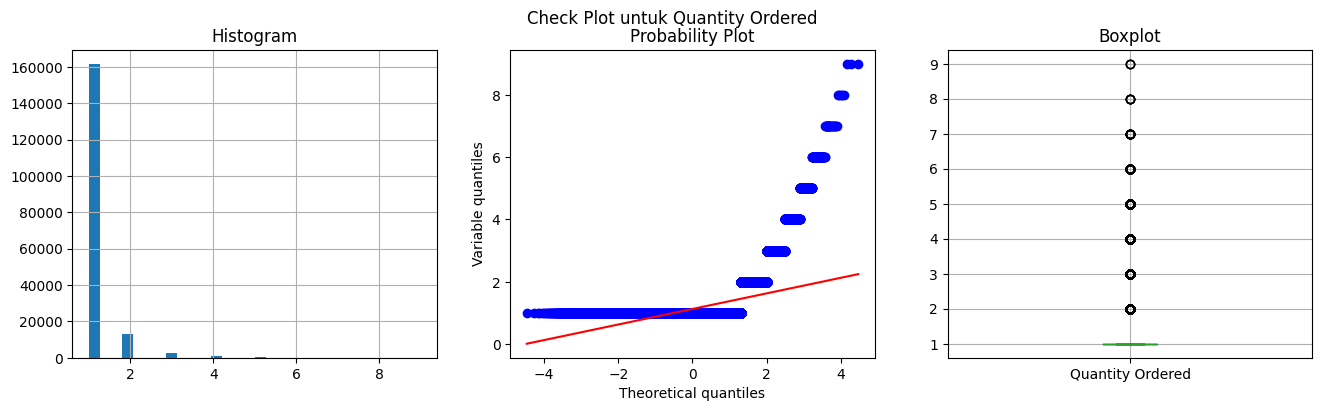

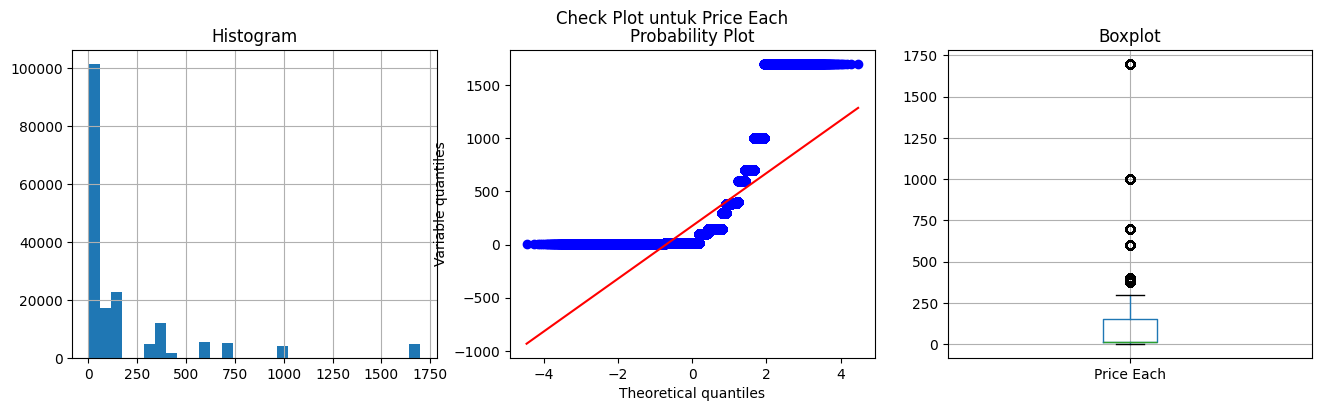

In [ ]:
for col in numeric_cols:
    check_plot(df_2019, col)

### Insight

- Teridentifikasi outlier pada kolom `Quantity Ordered` dan `Price Each` berdasarkan metode IQR, masing-masing sebesar `9.56%` dan `18.33%` dari total data.

- Namun, setelah dilakukan pengecekan visual dan mempertimbangkan konteks bisnis, nilai-nilai tersebut masih mungkin mencerminkan transaksi aktual (seperti pembelian dalam jumlah besar atau produk dengan harga tinggi).

- Oleh karena itu, outlier tidak dihapus untuk menjaga keaktualan data.

## Covert Datetime

In [ ]:
df_2019['Order Date'] = pd.to_datetime(df_2019['Order Date'], errors='coerce')

In [ ]:
df_2019 = df_2019.dropna(subset=['Order Date'])

In [ ]:
df_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
178432,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
178433,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
178434,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
178435,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [ ]:
df_2019.shape

(178437, 6)

## Feature Engineering (Awal)

In [ ]:
#sales column
df_2019['Sales'] = df_2019['Quantity Ordered'] * df_2019['Price Each']

In [ ]:
#order date column only
df_2019['Order_Date_Only'] = df_2019['Order Date'].dt.date

In [ ]:
df_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Order_Date_Only
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,2019-01-22
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,2019-01-28
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,2019-01-17
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,2019-01-05
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,2019-01-25
...,...,...,...,...,...,...,...,...
178432,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,2019-12-11
178433,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,2019-12-01
178434,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,2019-12-09
178435,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,2019-12-03


### Insight

- Telah dibuat kolom `Sales` dari Quantity Ordered x Price Each untuk mengukur nilai penjualan.

- Kolom `Order_Date_Only` juga ditambahkan untuk keperluan agregasi harian pada tahap eksplorasi dan modeling time series.

# EDA

## Distribusi

In [ ]:
df_2019[['Quantity Ordered','Price Each','Sales']].describe()

,Quantity Ordered,Price Each,Sales
count,178437.000000,178437.000000,178437.000000
mean,1.126964,176.001536,177.094428
std,0.446771,330.196016,330.336365
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,9.000000,1700.000000,3400.000000


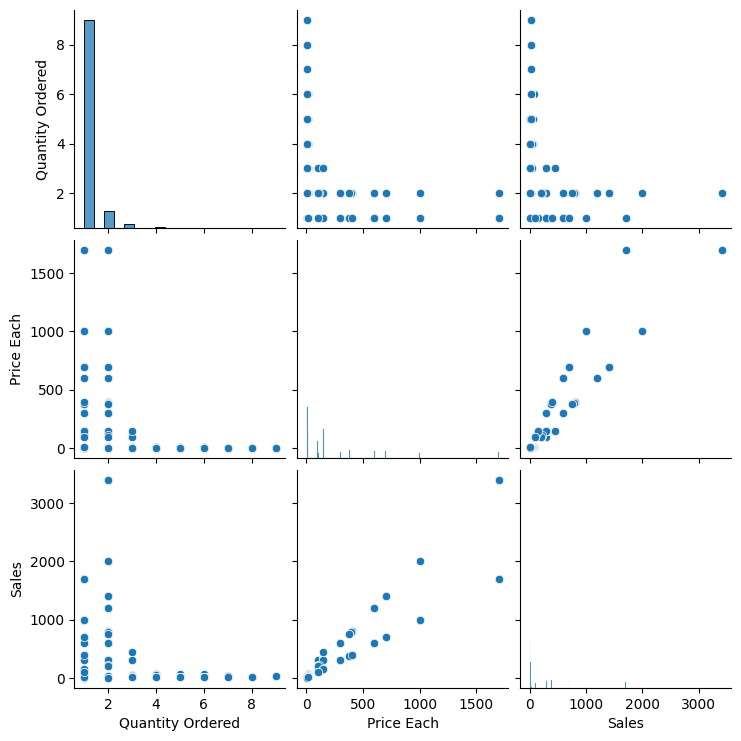

In [ ]:
sns.pairplot(df_2019[['Quantity Ordered','Price Each','Sales']])

**Insight**

-Berdasarkan eksplorasi awal, distribusi `Quantity Ordered`, `Price Each`, dan `Sales` menunjukkan pola skewed ke kanan, dengan dominasi pembelian bernilai kecil.

- `Median Quantity Ordered` adalah `1`, yang berarti sebagian besar pelanggan hanya membeli 1 unit per transaksi.

- Nilai `Sales` sangat dipengaruhi oleh beberapa produk mahal, menyebabkan standard deviation yang besar.

## Pertanyaan 1

Hitung total revenue, jumlah order, jumlah barang yang terjual sepanjang tahun 2019. Selain itu, hitung rata-rata jumlah barang yang dibeli per transaksi dan rata-rata spending per transaksi

In [ ]:
total_revenue = df_2019['Sales'].sum()
total_orders = df_2019['Order ID'].nunique()
total_quantity = df_2019['Quantity Ordered'].sum()
avg_qty_per_order = df_2019.groupby('Order ID')['Quantity Ordered'].sum().mean()
avg_spending_per_order = df_2019.groupby('Order ID')['Sales'].sum().mean()

In [ ]:
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Total Quantity Sold: {total_quantity:,}")
print(f"Average Quantity per Transaction: {avg_qty_per_order:.2f}")
print(f"Average Spending per Transaction: ${avg_spending_per_order:.2f}")

Total Revenue: $31,600,198.53
Total Orders: 178,437
Total Quantity Sold: 201,092
Average Quantity per Transaction: 1.13
Average Spending per Transaction: $177.09


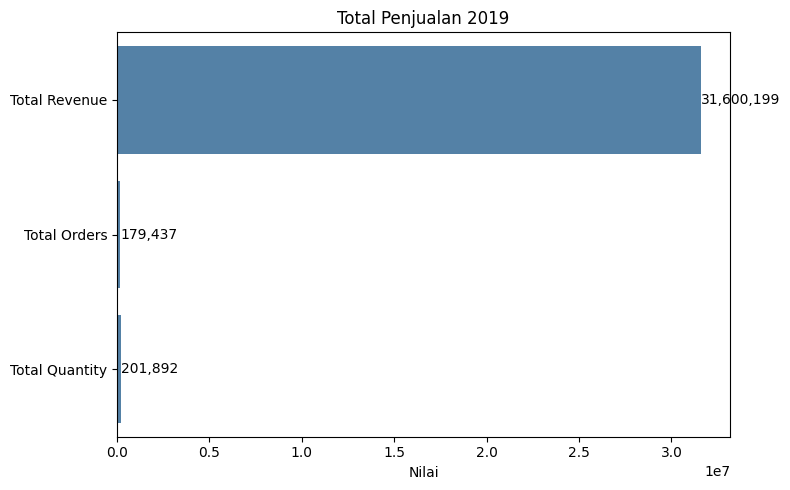

In [ ]:
total_metrics = {
    'Total Revenue': 31600198.53,
    'Total Orders': 179437,
    'Total Quantity': 201892
}

df_total = pd.DataFrame(list(total_metrics.items()), columns=['Metric', 'Value'])

plt.figure(figsize=(8, 5))
sns.barplot(data=df_total, x='Value', y='Metric', color='steelblue')

for index, row in df_total.iterrows():
    plt.text(row['Value'], index, f"{row['Value']:,.0f}", va='center')

plt.title('Total Penjualan 2019')
plt.xlabel('Nilai')
plt.ylabel('')
plt.tight_layout()
plt.show()

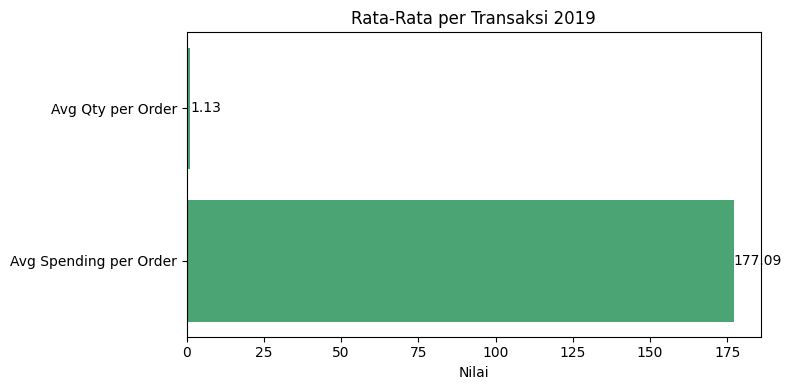

In [ ]:
avg_metrics = {
    'Avg Qty per Order': 1.13,
    'Avg Spending per Order': 177.09
}

df_avg = pd.DataFrame(list(avg_metrics.items()), columns=['Metric', 'Value'])

plt.figure(figsize=(8, 4))
sns.barplot(data=df_avg, x='Value', y='Metric', color='mediumseagreen')

for index, row in df_avg.iterrows():
    plt.text(row['Value'], index, f"{row['Value']:,.2f}", va='center')

plt.title('Rata-Rata per Transaksi 2019')
plt.xlabel('Nilai')
plt.ylabel('')
plt.tight_layout()
plt.show()

### Insight
- Total Revenue (GMV) sepanjang tahun 2019 mencapai $31.600.199, yang merupakan nilai keseluruhan dari pembelian customer setelah diskon.

- Total Orders tercatat sebanyak 179.437 pesanan, dan Total Quantity produk yang terjual adalah 201.892 unit.

- Rata-rata kuantitas per transaksi sangat rendah, yaitu hanya 1.13 unit/order, yang menunjukkan bahwa sebagian besar transaksi hanya terdiri dari satu produk.

- Rata-rata pengeluaran per transaksi adalah sekitar $176.09, menunjukkan bahwa meskipun jumlah produk per order sedikit, nilai per transaksi cukup tinggi, kemungkinan karena banyaknya produk-produk premium/elektronik bernilai tinggi.

## Pertanyaan 2
Hitunglah jumlah order dan GMV yang diperoleh dengan rentang waktu berikut: harian, mingguan, dan bulanan.

In [ ]:
#agg harian
df_harian = df_2019.groupby('Order_Date_Only').agg({
    'Order ID': 'count',
    'Sales': 'sum'
}).reset_index().rename(columns={
    'Order_Date_Only': 'Order Date',
    'Order ID': 'Order Count',
    'Sales': 'GMV'
})

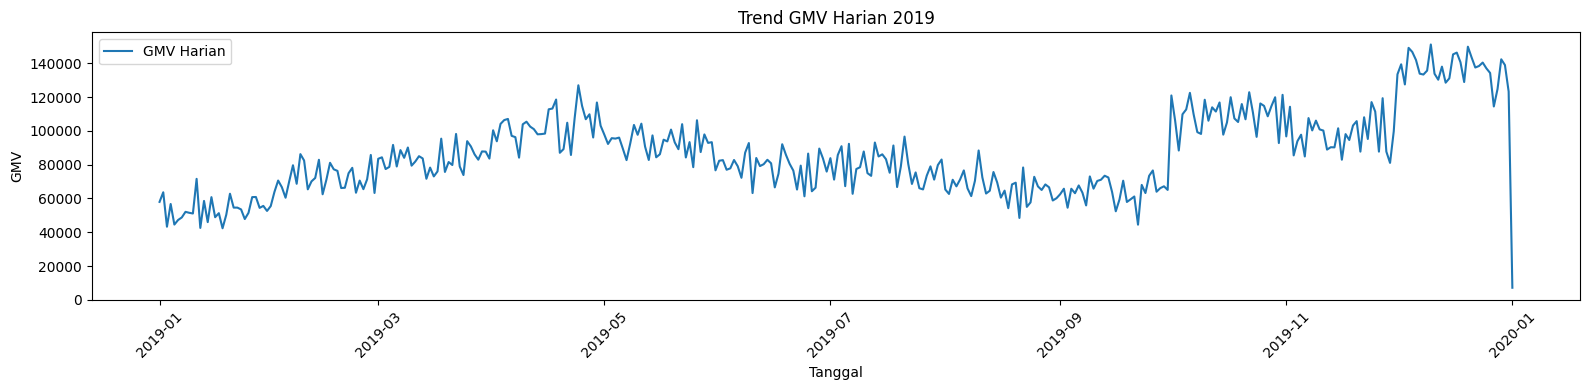

In [ ]:
plt.figure(figsize=(16, 4))
sns.lineplot(data=df_harian, x='Order Date', y='GMV', label='GMV Harian')
plt.title('Trend GMV Harian 2019')
plt.xlabel('Tanggal')
plt.ylabel('GMV')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
#agg mingguan
df_2019['Week'] = df_2019['Order Date'].dt.to_period('W').apply(lambda r: r.start_time)

df_mingguan = df_2019.groupby('Week').agg({
    'Order ID': 'count',
    'Sales': 'sum'
}).reset_index().rename(columns={
    'Week': 'Order Date',
    'Order ID': 'Order Count',
    'Sales': 'GMV'
})

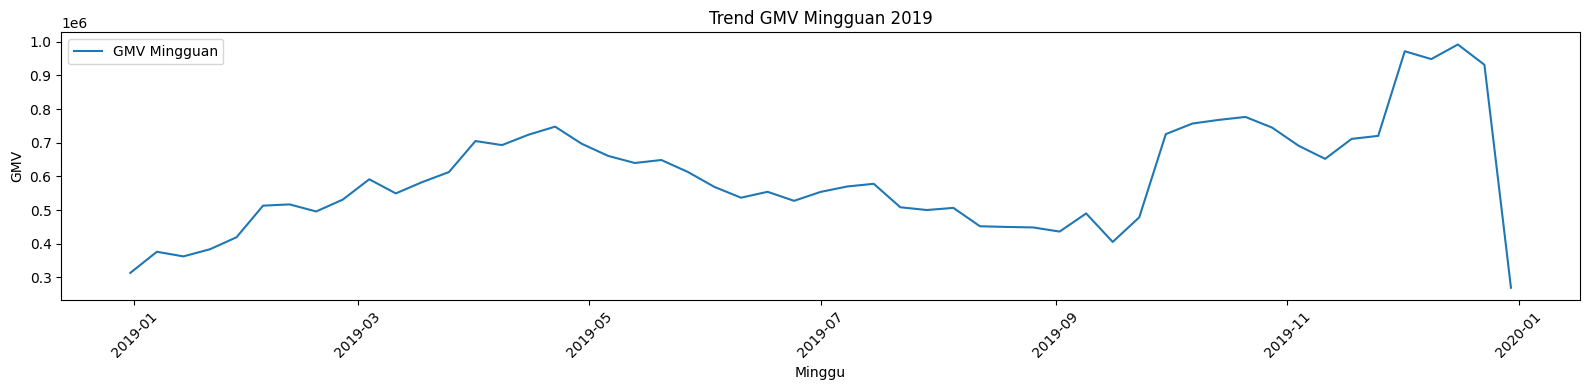

In [ ]:
plt.figure(figsize=(16, 4))
sns.lineplot(data=df_mingguan, x='Order Date', y='GMV', label='GMV Mingguan')
plt.title('Trend GMV Mingguan 2019')
plt.xlabel('Minggu')
plt.ylabel('GMV')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
df_2019['Month'] = df_2019['Order Date'].dt.to_period('M').astype(str)

df_bulanan = df_2019.groupby('Month').agg({
    'Order ID': 'count',
    'Sales': 'sum'
}).reset_index().rename(columns={
    'Month': 'Order Date',
    'Order ID': 'Order Count',
    'Sales': 'GMV'
})

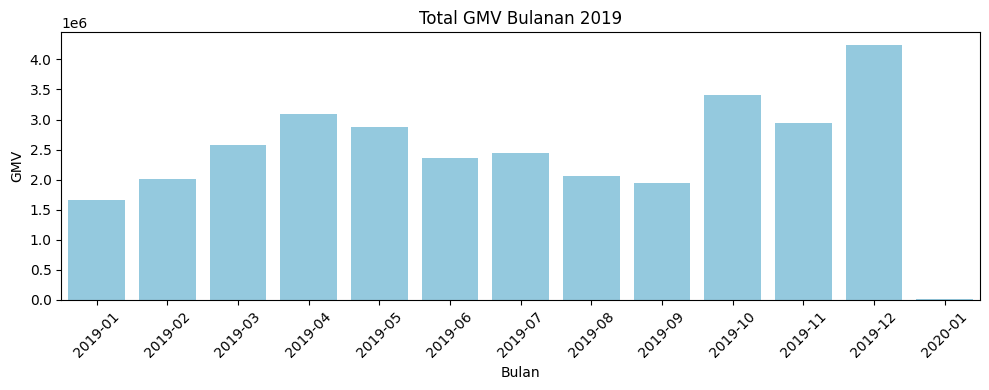

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df_bulanan, x='Order Date', y='GMV', color='skyblue')
plt.title('Total GMV Bulanan 2019')
plt.xlabel('Bulan')
plt.ylabel('GMV')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insight

- Trend Harian
  - GMV harian cenderung fluktuatif setiap hari. Namun, mulai Oktober hingga Desember 2019, terlihat lonjakan GMV yang konsisten dan signifikan dibandingkan bulan-bulan sebelumnya. Puncaknya terjadi di akhir Desember, diduga akibat momen promo akhir tahun.

- Trend Mingguan
  - Pola mingguan memperlihatkan tren peningkatan bertahap sejak awal tahun. Terdapat penurunan di pertengahan tahun (Juli–September), lalu kembali meningkat tajam sejak minggu ke-40 (awal Oktober) hingga akhir tahun.

- Trend Bulanan
  - GMV bulanan menunjukkan peningkatan konsisten sepanjang tahun, dengan lonjakan paling tajam terjadi pada Oktober hingga Desember. Bulan Desember 2019 menjadi bulan dengan GMV tertinggi sepanjang tahun.

## Pertanyaan 3

Tim marketing ingin mengetahui produk apa saja yang paling sering dibeli dalam 1 tahun terakhir. Rencananya, mereka akan mencoba mem-bundling top produk ini untuk meningkatkan penjualan. Identifikasi top 10 produk yang membawa revenue terbesar dalam 3 bulan terakhir dan produk apa saja yang bisa di-bundling berdasarkan hasil analisis

In [ ]:
df_2019['Order Date'] = pd.to_datetime(df_2019['Order Date'])

last_3_months = df_2019[df_2019['Order Date'] >= '2019-10-01']

top_products = last_3_months.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

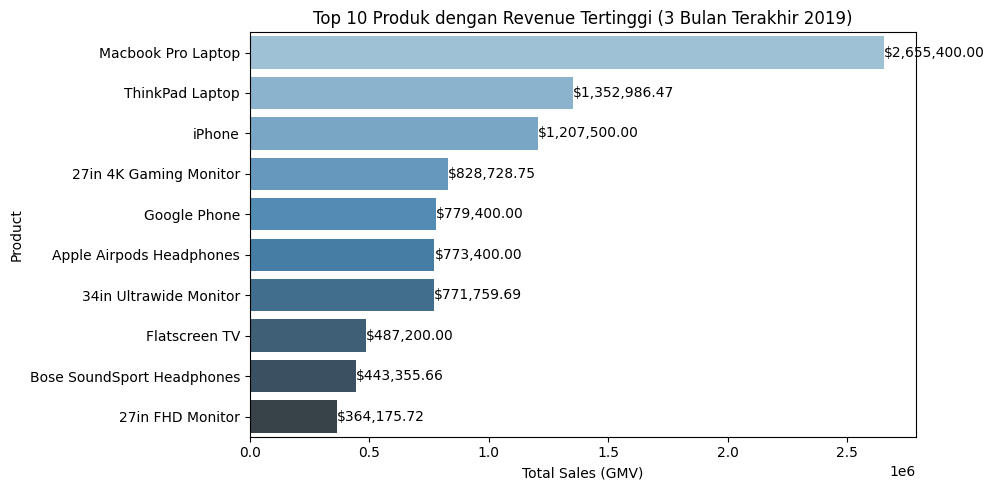

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_products, x='Sales', y='Product', palette='Blues_d')

#label
for index, row in top_products.iterrows():
    plt.text(row['Sales'], index, f"${row['Sales']:,.2f}", va='center')


plt.title('Top 10 Produk dengan Revenue Tertinggi (3 Bulan Terakhir 2019)')
plt.xlabel('Total Sales (GMV)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

### Insight
- Macbook Pro Laptop menjadi penyumbang revenue tertinggi dengan total $2.6 juta, lebih dari dua kali lipat dari posisi kedua.

- Produk berteknologi tinggi dan premium mendominasi daftar: Macbook, ThinkPad, iPhone, dan berbagai monitor resolusi tinggi.

- Headphones dan TV juga masuk ke dalam daftar, menunjukkan ketertarikan pasar pada produk hiburan.

- Produk bundling potensial:

  - Laptop + Monitor (misal: Macbook Pro + 27in 4K / 34in Ultrawide Monitor)

  - Smartphone + Earphone (iPhone + Apple Airpods)

  - TV + Headphones (Flatscreen TV + Bose SoundSport)

## Pertanyaan 4

Identifikasi top 5 kota yang memiliki order terbanyak dan 5 kota yang memiliki total dan rata-rata spending terbesar.

In [ ]:
df_2019['City'] = df_2019['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
df_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Order_Date_Only,Week,Month,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,2019-01-22,2019-01-21,2019-01,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,2019-01-28,2019-01-28,2019-01,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,2019-01-17,2019-01-14,2019-01,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,2019-01-05,2018-12-31,2019-01,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,2019-01-25,2019-01-21,2019-01,Austin
...,...,...,...,...,...,...,...,...,...,...,...
178432,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,2019-12-11,2019-12-09,2019-12,San Francisco
178433,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,2019-12-01,2019-11-25,2019-12,Los Angeles
178434,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,2019-12-09,2019-12-09,2019-12,Seattle
178435,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,2019-12-03,2019-12-02,2019-12,Dallas


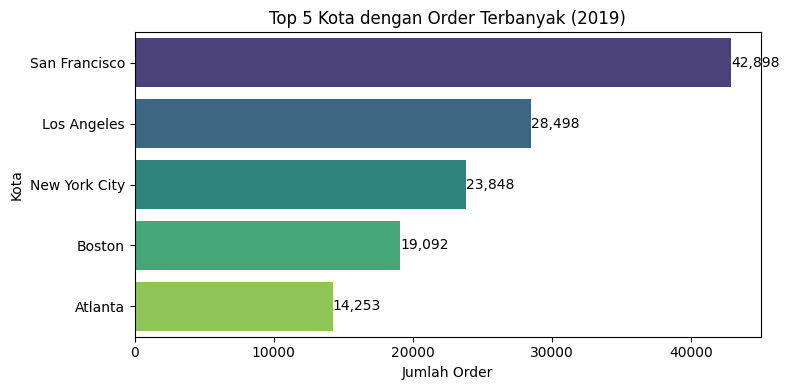

In [ ]:
top_orders = df_2019.groupby('City')['Order ID'].nunique().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=top_orders, x='Order ID', y='City', palette='viridis')
for i, row in top_orders.iterrows():
    plt.text(row['Order ID'], i, f"{row['Order ID']:,}", va='center')
plt.title('Top 5 Kota dengan Order Terbanyak (2019)')
plt.xlabel('Jumlah Order')
plt.ylabel('Kota')
plt.tight_layout()
plt.show()

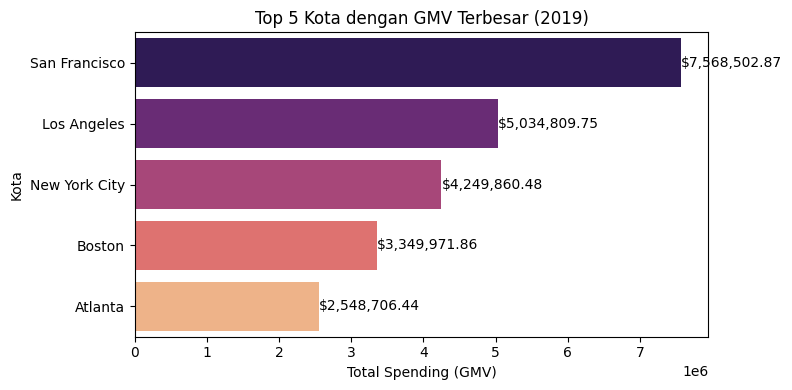

In [ ]:
top_gmv = df_2019.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=top_gmv, x='Sales', y='City', palette='magma')
for i, row in top_gmv.iterrows():
    plt.text(row['Sales'], i, f"${row['Sales']:,.2f}", va='center')
plt.title('Top 5 Kota dengan GMV Terbesar (2019)')
plt.xlabel('Total Spending (GMV)')
plt.ylabel('Kota')
plt.tight_layout()
plt.show()

In [ ]:
total_sales_per_city = df_2019.groupby('City')['Sales'].sum()
total_orders_per_city = df_2019.groupby('City')['Order ID'].nunique()

avg_spending_per_order = (total_sales_per_city / total_orders_per_city).sort_values(ascending=False).head(5)

avg_spending_df = avg_spending_per_order.reset_index()
avg_spending_df.columns = ['City', 'Avg Spending per Order']

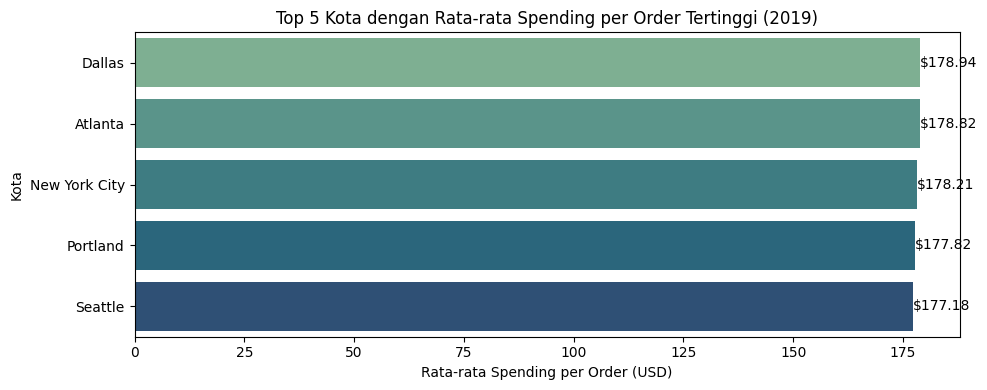

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(data=avg_spending_df, x='Avg Spending per Order', y='City', palette='crest')

# Label
for index, row in avg_spending_df.iterrows():
    plt.text(row['Avg Spending per Order'], index, f"${row['Avg Spending per Order']:.2f}", va='center')

plt.title('Top 5 Kota dengan Rata-rata Spending per Order Tertinggi (2019)')
plt.xlabel('Rata-rata Spending per Order (USD)')
plt.ylabel('Kota')
plt.tight_layout()
plt.show()

### Insight

-  Top 5 Kota dengan Order Terbanyak (Volume Transaksi)
  - San Francisco menempati posisi pertama dengan 42.898 order, jauh di atas kota lain.

  - Diikuti oleh Los Angeles, New York City, Boston, dan Atlanta.

  - Kota-kota ini merupakan pusat populasi besar, kemungkinan didukung oleh aktivitas belanja online yang tinggi.

  - Interpretasi: San Francisco adalah pusat transaksi terbanyak, menjadikannya kandidat utama untuk strategi pemasaran berbasis volume.

- Top 5 Kota dengan Total Spending Tertinggi (GMV)
  - San Francisco juga menjadi kota dengan GMV tertinggi, yaitu sekitar $7,57 juta.

  - Diikuti oleh Los Angeles, New York City, Boston, dan Atlanta.

  - Pola ini menunjukkan konsistensi antara banyaknya order dan tingginya nilai transaksi total di kota-kota besar.

  - Interpretasi: Kota dengan order tinggi juga berkontribusi besar terhadap revenue. Kampanye loyalitas atau bundling dapat ditargetkan di kota-kota ini untuk mempertahankan GMV.

-  Top 5 Kota dengan Rata-rata Spending per Order Tertinggi
  - Dallas memimpin dengan rata-rata $178.94 per transaksi, diikuti oleh Atlanta, New York City, Portland, dan Seattle.

  - Kota seperti Dallas dan Seattle tidak masuk dalam top order atau GMV tertinggi, tapi spending per transaksinya tinggi.

  - Interpretasi: Kota-kota ini punya potensi pembeli dengan daya beli tinggi per order. Cocok untuk strategi produk premium, upselling, atau penawaran eksklusif.

## Pertanyaan 5

Tim marketing ingin mengetahui kapan penjualan mencapai titik tertinggi sehingga mereka bisa merancang strategi marketing. Analisis pada rentang jam berapa penjualan terjadi secara aktif (rush hour).

In [ ]:
#'Hour'
df_2019['Hour'] = df_2019['Order Date'].dt.hour

#jumlah order per jam
order_per_hour = df_2019.groupby('Hour').size().reset_index(name='Total Orders')

In [ ]:
df_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Order_Date_Only,Week,Month,City,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,2019-01-22,2019-01-21,2019-01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,2019-01-28,2019-01-28,2019-01,Portland,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,2019-01-17,2019-01-14,2019-01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,2019-01-05,2018-12-31,2019-01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,2019-01-25,2019-01-21,2019-01,Austin,11
...,...,...,...,...,...,...,...,...,...,...,...,...
178432,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,2019-12-11,2019-12-09,2019-12,San Francisco,20
178433,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,2019-12-01,2019-11-25,2019-12,Los Angeles,12
178434,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,2019-12-09,2019-12-09,2019-12,Seattle,6
178435,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,2019-12-03,2019-12-02,2019-12,Dallas,10


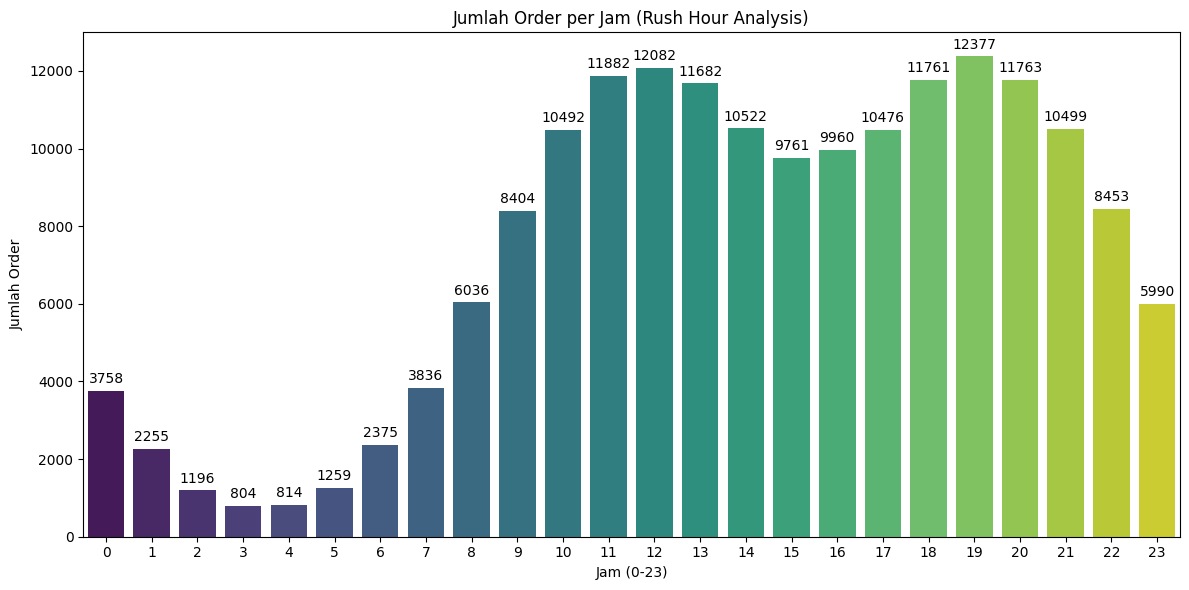

In [ ]:
# Visualisasi
plt.figure(figsize=(12,6))
sns.barplot(data=order_per_hour, x='Hour', y='Total Orders', palette='viridis')

#label
for index, row in order_per_hour.iterrows():
    plt.text(row['Hour'], row['Total Orders']+200, row['Total Orders'], ha='center')

plt.title('Jumlah Order per Jam (Rush Hour Analysis)')
plt.xlabel('Jam (0-23)')
plt.ylabel('Jumlah Order')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### Insight
- Jam penjualan paling aktif (rush hour) terjadi pada:

  - Pukul 19:00 (jam 19) → jumlah order tertinggi: 12.377 pesanan

  - Diikuti oleh jam 12 dan 11 siang (sekitar jam istirahat makan siang) serta jam 18–20 malam.

- Pola penjualan menunjukkan dua puncak utama:

  - Siang hari (11:00–13:00): Mungkin banyak konsumen yang melakukan pembelian saat istirahat kerja.

  - Malam hari (18:00–20:00): Merupakan jam santai setelah pulang kerja, sehingga aktivitas belanja meningkat.

  - Penjualan mulai menurun drastis setelah pukul 21:00, dan sangat rendah pada dini hari (jam 2–6).

# Processing

In [ ]:
daily_revenue = df_2019.groupby(df_2019['Order Date'].dt.date)['Sales'].sum().reset_index()

In [ ]:
daily_revenue.columns = ['Date', 'Total_Revenue']

In [ ]:
daily_revenue['Date'] = pd.to_datetime(daily_revenue['Date'])
daily_revenue.head(10)

,Date,Total_Revenue
0,2019-01-01,57956.16
1,2019-01-02,63645.28
2,2019-01-03,43281.70
3,2019-01-04,56735.27
4,2019-01-05,44544.73
5,2019-01-06,47235.64
6,2019-01-07,48757.55
7,2019-01-08,52070.85
8,2019-01-09,51514.28
9,2019-01-10,51093.66


## Stasioner dan Uji ADF

In [ ]:
ts = daily_revenue.set_index('Date')['Total_Revenue']
ts.head(10)

,Total_Revenue
Date,
2019-01-01,57956.16
2019-01-02,63645.28
2019-01-03,43281.70
2019-01-04,56735.27
2019-01-05,44544.73
2019-01-06,47235.64
2019-01-07,48757.55
2019-01-08,52070.85
2019-01-09,51514.28


In [ ]:
adf_result = adfuller(ts)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

#belum stasioner

ADF Statistic: -2.323221289383357
p-value: 0.1645879729421531


In [ ]:
# transfrom log
ts_log = np.log(ts)

#diff (pengurangan nilai dengan nilai sebelumnya)
ts_log_diff = ts_log.diff().dropna() # .diff() akan menghasilkan Nan pada baris pertama, maka di drrop

#uji adf dengan hasil log
adf_result_diff = adfuller(ts_log_diff)
print('ADF Statistic:', adf_result_diff[0])
print('p-value:', adf_result_diff[1])

ADF Statistic: -9.792014167104876
p-value: 6.316732387851882e-17


### Insight

- Uji adf pertama menyatakan bahwa data belum stasioner
  - ADF Statistic: `-2.323221289383357`
  - p-value: `0.1645879729421531`

- maka saya melakukan transform, dan hasilnya data sudah stasioner
  - ADF Statistic: `-9.792014167104876`
  - p-value: `6.316732387851882e-17`


- p-value `< 0.05`

## Modeling

### ARIMA

In [ ]:
#split
# Train sampai 30 November
train = ts[:'2019-11-30']

# Test dari 1 Desember
test = ts['2019-12-01':]

In [ ]:
#arima
model_arima = ARIMA (np.log(train), order=(1,1,1))
result_arima = model_arima.fit()

forecast_arima_log = result_arima.forecast(steps=len(test))

forecast_arima = np.exp(forecast_arima_log)

### ETS

In [ ]:
model_ets = ExponentialSmoothing(train, trend='add', seasonal=None, damped_trend=False)
result_ets = model_ets.fit()
forecast_ets = result_ets.forecast(steps=len(test))

### MAPE

In [ ]:
mape_arima = mean_absolute_percentage_error(test, forecast_arima)
mape_ets = mean_absolute_percentage_error(test, forecast_ets)

print(f'MAPE ARIMA: {mape_arima:.2%}')
print(f'MAPE ETS: {mape_ets:.2%}')

MAPE ARIMA: 67.66%
MAPE ETS: 67.41%


In [ ]:
best_model = "ARIMA" if mape_arima < mape_ets else "ETS"

print(f"Model terbaik berdasarkan MAPE adalah: {best_model}")

Model terbaik berdasarkan MAPE adalah: ETS


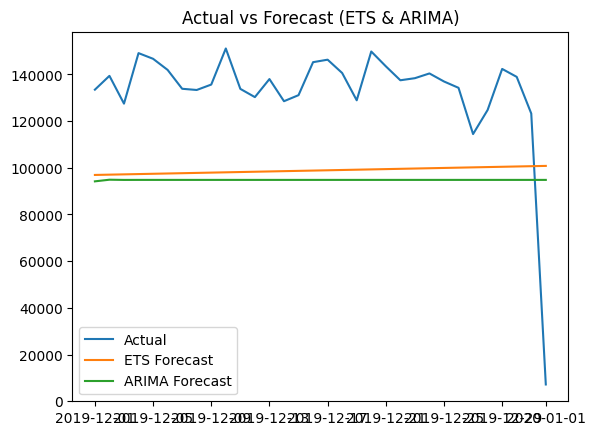

In [ ]:
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_ets, label='ETS Forecast')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast')
plt.legend()
plt.title('Actual vs Forecast (ETS & ARIMA)')
plt.show()

## Forcasting

In [ ]:
steps_ahead = 30

if best_model == "ARIMA":

    tuned_arima_model = ARIMA(np.log(train), order=(1,1,1)).fit()


    forecast_log = tuned_arima_model.forecast(steps=steps_ahead)


    forecast = np.exp(forecast_log)

else:

    tuned_ets_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7).fit()


    forecast = tuned_ets_model.forecast(steps=steps_ahead)


forecast.index = pd.date_range(start='2020-01-01', periods=steps_ahead, freq='D')


test_30 = test[:steps_ahead]


mape = mean_absolute_percentage_error(test_30, forecast)
mae = mean_absolute_error(test_30, forecast)
rmse = np.sqrt(mean_squared_error(test_30, forecast))


print(f"MAPE: {mape:.2%}")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

MAPE: 28.01%
MAE : 38,775.81
RMSE: 39,623.95


In [ ]:
forecast_jan_df = forecast.to_frame().reset_index()

forecast_jan_df.columns = ['Date', 'Forecasted_Revenue']

forecast_jan_df.head()

,Date,Forecasted_Revenue
0,2020-01-01,97122.246786
1,2020-01-02,96080.216052
2,2020-01-03,97820.404305
3,2020-01-04,98166.559106
4,2020-01-05,96772.086668


In [ ]:
Macbook_Pro_Laptop = df_2019[df_2019['Product'].str.contains("Macbook Pro Laptop", na=False)]

Macbook_Pro_Laptop_sales_daily = Macbook_Pro_Laptop.groupby(Macbook_Pro_Laptop['Order Date'].dt.date)['Quantity Ordered'].sum()
Macbook_Pro_Laptop_sales_daily.index = pd.to_datetime(Macbook_Pro_Laptop_sales_daily.index)

Macbook_Pro_Laptop_ts = Macbook_Pro_Laptop_sales_daily.resample('D').sum().fillna(0)
model_Macbook_Pro_Laptop = ARIMA(Macbook_Pro_Laptop_ts, order=(1,1,1)).fit()
forecast_Macbook_Pro_Laptop_jan = model_Macbook_Pro_Laptop.forecast(steps=30)
forecast_Macbook_Pro_Laptop_jan.index = pd.date_range(start='2020-01-01', periods=30, freq='D')
forecast_Macbook_Pro_Laptop_jan = forecast_Macbook_Pro_Laptop_jan.rename("Forecasted_Macbook_Pro_Laptop_Units")

In [ ]:
forecast_Macbook_Pro_Laptop_jan.head()

,Forecasted_Macbook_Pro_Laptop_Units
2020-01-01,16.527153
2020-01-02,15.576224
2020-01-03,15.634462
2020-01-04,15.630895
2020-01-05,15.631114


### Insight

- Total Revenue Forecast (Januari 2020):

  - Rata-rata pendapatan harian diprediksi stabil sekitar 97,000–98,000+.

  - Tim keuangan dapat menyiapkan alokasi cash flow atau target bulanan berdasarkan prediksi ini.

  - Variasi cukup kecil → cocok untuk perencanaan jangka pendek.

- Produk Macbook Pro Laptop:

  - Prediksi penjualan harian berada di kisaran 15–16 unit per hari.

  - Ini dapat dijadikan dasar alokasi stok harian dan strategi promosi.

  - Bila ingin meningkatkan penjualan, perlu mendorong di segmen high-end seperti Macbook melalui kampanye khusus.

- Model Evaluasi:

  - ETS memiliki akurasi sedikit lebih baik dibanding ARIMA untuk data ini (MAPE lebih kecil).

  - Disarankan menggunakan ETS untuk prediksi lanjutan, namun validasi berkala tetap penting (misal rolling forecast).